In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
# Create a sample dataset with customer annual income and spending score
data = {'AnnualIncome': [
        15, 15.5, 16, 16.5, 17, 17.5, 18, 18.5, 19, 19.5, 
        20, 20.5, 21, 21.5, 22, 22.5, 23, 23.5, 24, 24.5, 
        25, 25.5, 26, 26.5, 27, 27.5, 28, 28.5, 29, 29.5, 
        30, 30.5, 31, 31.5, 32, 32.5, 33, 33.5, 34, 34.5, 
        35,   # Normal points
        80, 85, 90  # Outliers
    ],
    'SpendingScore': [
        39, 42, 45, 48, 51, 54, 57, 60, 63, 66,
        69, 72, 75, 78, 81, 84, 87, 90, 93, 96,
        6, 9, 12, 15, 18, 21, 24, 27, 30, 33,
        5, 8, 11, 14, 17, 20, 23, 26, 29, 32,
        56,   # Normal points
        2, 3, 100  # Outliers
    ]}

df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

   AnnualIncome  SpendingScore
0          15.0             39
1          15.5             42
2          16.0             45
3          16.5             48
4          17.0             51


This dataset contains two features:

- AnnualIncome: Annual income of the customer in thousands.
- SpendingScore: A score assigned based on customer behavior, from 1 (low) to 100 (high).

### Step 4. Preprocessing the data
Clustering algorithms are sensitive to the scale of the features, so it’s essential to normalize the data. We’ll use StandardScaler to scale the features.

In [3]:
# Normalize the dataset using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert the scaled data back into a DataFrame for easier handling
df_scaled = pd.DataFrame(df_scaled, columns=['AnnualIncome', 'SpendingScore'])
print(df_scaled.head())

   AnnualIncome  SpendingScore
0     -0.869761      -0.135877
1     -0.838899      -0.033387
2     -0.808036       0.069103
3     -0.777174       0.171594
4     -0.746311       0.274084


### Step 5. Implementing k-means clustering

In [4]:
# Initialize the KMeans algorithm with k clusters
k = 3  # You can start with 3 clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model and assign cluster labels
kmeans.fit(df_scaled)
df['Cluster'] = kmeans.labels_

# Display the first few rows with cluster assignments
print(df.head())

   AnnualIncome  SpendingScore  Cluster
0          15.0             39        2
1          15.5             42        2
2          16.0             45        2
3          16.5             48        2
4          17.0             51        2


k: The number of clusters. You can start with an arbitrary value of k = 3 and later evaluate the performance to choose the best number of clusters.

kmeans.labels_: The labels assigned to each data point, indicating the cluster they belong to.

### Step 6. Visualizing the clusters

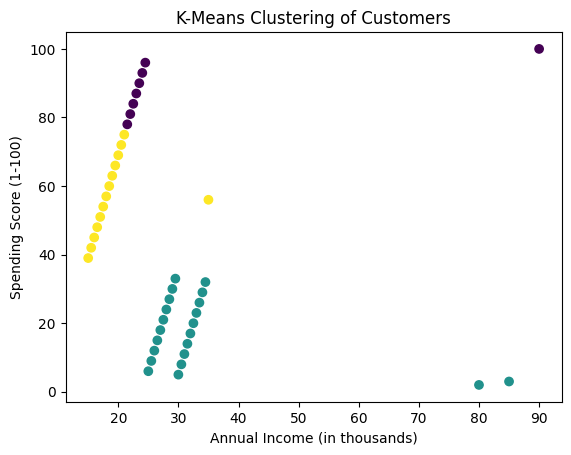

In [5]:
# Plot the clusters
plt.scatter(df['AnnualIncome'], df['SpendingScore'], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Customers')
plt.xlabel('Annual Income (in thousands)')
plt.ylabel('Spending Score (1-100)')
plt.show()

This scatterplot shows how the data points are grouped into clusters based on their annual income and spending score.

### Step 7. Finding the optimal number of clusters (optional)

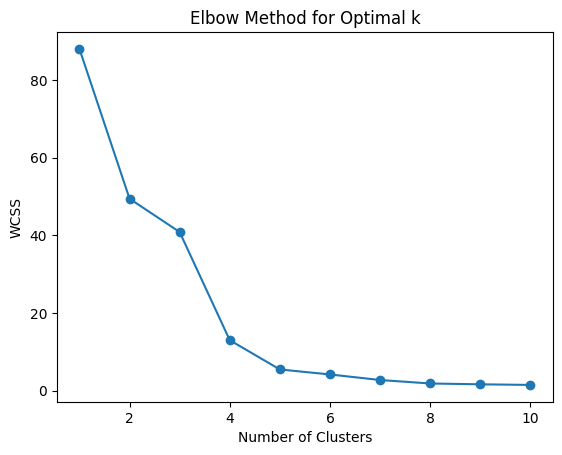

In [18]:
# Calculate the WCSS for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the WCSS to visualize the Elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### 不考虑Elbow Method推荐的情况，仅仅考虑silhouette_score, davies_bouldin_score


=== Clustering Evaluation Results ===
   k  Silhouette  Davies-Bouldin
0  3    0.457483        0.900716
1  4    0.583448        0.555374
2  5    0.599789        0.378561

Recommended by Silhouette ↑ : k = 5
Recommended by DBI ↓       : k = 5
Recommended (combined)     : k = 5


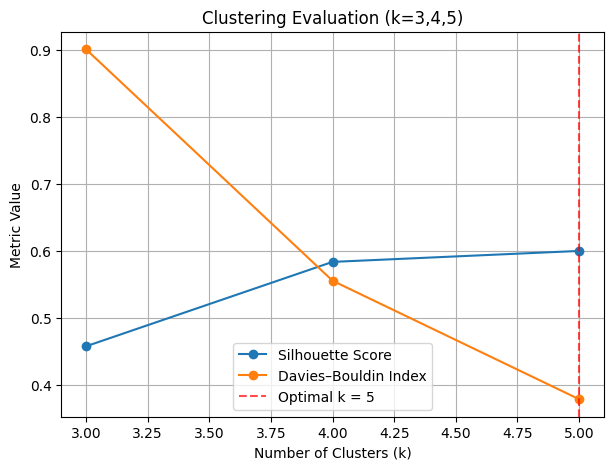

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# ====== 原始数据 ======
data = {
    'AnnualIncome': [
        15, 15.5, 16, 16.5, 17, 17.5, 18, 18.5, 19, 19.5,
        20, 20.5, 21, 21.5, 22, 22.5, 23, 23.5, 24, 24.5,
        25, 25.5, 26, 26.5, 27, 27.5, 28, 28.5, 29, 29.5,
        30, 30.5, 31, 31.5, 32, 32.5, 33, 33.5, 34, 34.5,
        35,  # Normal points
        80, 85, 90  # Outliers
    ],
    'SpendingScore': [
        39, 42, 45, 48, 51, 54, 57, 60, 63, 66,
        69, 72, 75, 78, 81, 84, 87, 90, 93, 96,
        6, 9, 12, 15, 18, 21, 24, 27, 30, 33,
        5, 8, 11, 14, 17, 20, 23, 26, 29, 32,
        56,   # Normal points
        2, 3, 100  # Outliers
    ]
}
df = pd.DataFrame(data)

# ====== 数据标准化 ======
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# ====== 计算 k=3,4,5 下的指标 ======
results = []
for k in [3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    sil = silhouette_score(df_scaled, labels)
    dbi = davies_bouldin_score(df_scaled, labels)
    results.append({'k': k, 'Silhouette': sil, 'Davies-Bouldin': dbi})

results = pd.DataFrame(results)
print("\n=== Clustering Evaluation Results ===")
print(results)

# ====== 自动推荐逻辑 ======
# 1. 分别选出 Silhouette 最大、DBI 最小的 k
k_sil = results.loc[results['Silhouette'].idxmax(), 'k']
k_dbi = results.loc[results['Davies-Bouldin'].idxmin(), 'k']

# 2. 综合评分（Silhouette 排名 + DBI 排名，越小越好）
results['sil_rank'] = results['Silhouette'].rank(ascending=False, method='min')
results['dbi_rank'] = results['Davies-Bouldin'].rank(ascending=True, method='min')
results['combo_score'] = results['sil_rank'] + results['dbi_rank']
k_combo = results.sort_values(['combo_score', 'k']).iloc[0]['k']

print(f"\nRecommended by Silhouette ↑ : k = {int(k_sil)}")
print(f"Recommended by DBI ↓       : k = {int(k_dbi)}")
print(f"Recommended (combined)     : k = {int(k_combo)}")

# ====== 可视化 ======
plt.figure(figsize=(7, 5))
plt.plot(results['k'], results['Silhouette'], 'o-', label='Silhouette Score')
plt.plot(results['k'], results['Davies-Bouldin'], 'o-', label='Davies–Bouldin Index')
plt.title('Clustering Evaluation (k=3,4,5)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)

# 标出综合推荐的 k
plt.axvline(x=k_combo, color='red', linestyle='--', alpha=0.7, label=f'Optimal k = {int(k_combo)}')
plt.legend()
plt.show()


#### 可以看到不考虑Elbow method的推荐，实际上silhouette_score, davies_bouldin_score推荐的K值是 k=5

#### 下面考虑全部3个metrics


=== Scores ===
    k       WCSS  Silhouette       DBI
0  3  18.569893    0.616621  0.520981
1  4  11.030267    0.631906  0.325894
2  5   5.415273    0.599507  0.386367

Recommend · Silhouette↑ : k = 4
Recommend · DBI↓        : k = 4
Recommend · Elbow-bound : k = 4  (elbow_k = 4)
Recommend · Parsimony   : k = 3  (Sil ≥ 0.600, DBI ≤ 0.526)


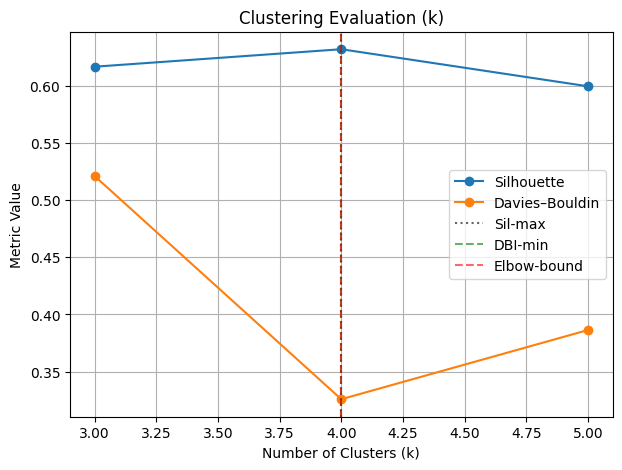

In [20]:
# ==== 评估 k ====
ks = [3,4,5]
rows = []
for k in ks:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(df_scaled)
    rows.append({
        "k": k,
        "WCSS": km.inertia_,
        "Silhouette": silhouette_score(df_scaled, labels),
        "DBI": davies_bouldin_score(df_scaled, labels)
    })
res = pd.DataFrame(rows).sort_values("k").reset_index(drop=True)
print("\n=== Scores ===\n", res)

# ---------- 1) 纯指标推荐（Silhouette 最大、DBI 最小、并列取更小 k） ----------
k_sil = int(res.loc[res["Silhouette"].idxmax(), "k"])
k_dbi = int(res.loc[res["DBI"].idxmin(), "k"])

# ---------- 2) 肘部约束：先找 WCSS 的 elbow_k，再在 k<=elbow_k 内选 ----------
# 简单“最大曲率”近似：用三点二阶差分估 elbow；边界回退为下降速率显著变缓处
def find_elbow_k(df):
    k_vals = df["k"].to_numpy()
    w = df["WCSS"].to_numpy()
    # 归一化到线段，最大距离法（简化 Kneedle）
    x = (k_vals - k_vals.min())/(k_vals.max()-k_vals.min())
    y = (w - w.min())/(w.max()-w.min())
    # 直线两端点
    p1 = np.array([x[0], y[0]])
    p2 = np.array([x[-1], y[-1]])
    # 点到直线距离
    A = p2[1] - p1[1]
    B = p1[0] - p2[0]
    C = p2[0]*p1[1] - p1[0]*p2[1]
    dists = np.abs(A*x + B*y + C) / np.sqrt(A**2 + B**2)
    elbow_idx = int(np.argmax(dists))
    return int(k_vals[elbow_idx])

elbow_k = find_elbow_k(res)

# 在 k<=elbow_k 的候选里选综合最优（Silhouette 排名↓ + DBI 排名↑）
cand = res[res["k"] <= elbow_k].copy()
cand["rank"] = cand["Silhouette"].rank(ascending=False, method="min") + \
               cand["DBI"].rank(ascending=True,  method="min")
k_elbow_constrained = int(cand.sort_values(["rank","k"]).iloc[0]["k"])

# ---------- 3) 简洁优先：在“接近最优”的范围内选最小 k ----------
sil_max = res["Silhouette"].max()
dbi_min = res["DBI"].min()
# 容忍度（可调）：Sil ≥ 95%*max 且 DBI ≤ min+0.20
tol_sil = 0.95 * sil_max
tol_dbi = dbi_min + 0.20
simple_cands = res[(res["Silhouette"] >= tol_sil) & (res["DBI"] <= tol_dbi)]
k_parsimonious = int(simple_cands.sort_values("k").iloc[0]["k"]) if not simple_cands.empty else k_sil

print(f"\nRecommend · Silhouette↑ : k = {k_sil}")
print(f"Recommend · DBI↓        : k = {k_dbi}")
print(f"Recommend · Elbow-bound : k = {k_elbow_constrained}  (elbow_k = {elbow_k})")
print(f"Recommend · Parsimony   : k = {k_parsimonious}  "
      f"(Sil ≥ {tol_sil:.3f}, DBI ≤ {tol_dbi:.3f})")

# ==== 可视化（保留你的图，并标出三种推荐） ====
plt.figure(figsize=(7,5))
plt.plot(res['k'], res['Silhouette'], 'o-', label='Silhouette')
plt.plot(res['k'], res['DBI'], 'o-', label='Davies–Bouldin')
for x, color, style, name in [
    (k_sil, 'black', ':', 'Sil-max'),
    (k_dbi, 'green', '--', 'DBI-min'),
    (k_elbow_constrained, 'red', '--', 'Elbow-bound'),
]:
    plt.axvline(x=x, color=color, linestyle=style, alpha=0.6, label=name)
plt.title('Clustering Evaluation (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Metric Value')
plt.grid(True); plt.legend(); plt.show()